<a href="https://colab.research.google.com/github/Gouri1801/Diabetes/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz  # to export graph of decision tree to pdf
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, classification_report , confusion_matrix


In [ ]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('diabetes.csv')

In [ ]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [ ]:
# getting the statistical measures of the data
diabetes_dataset.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes_dataset.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

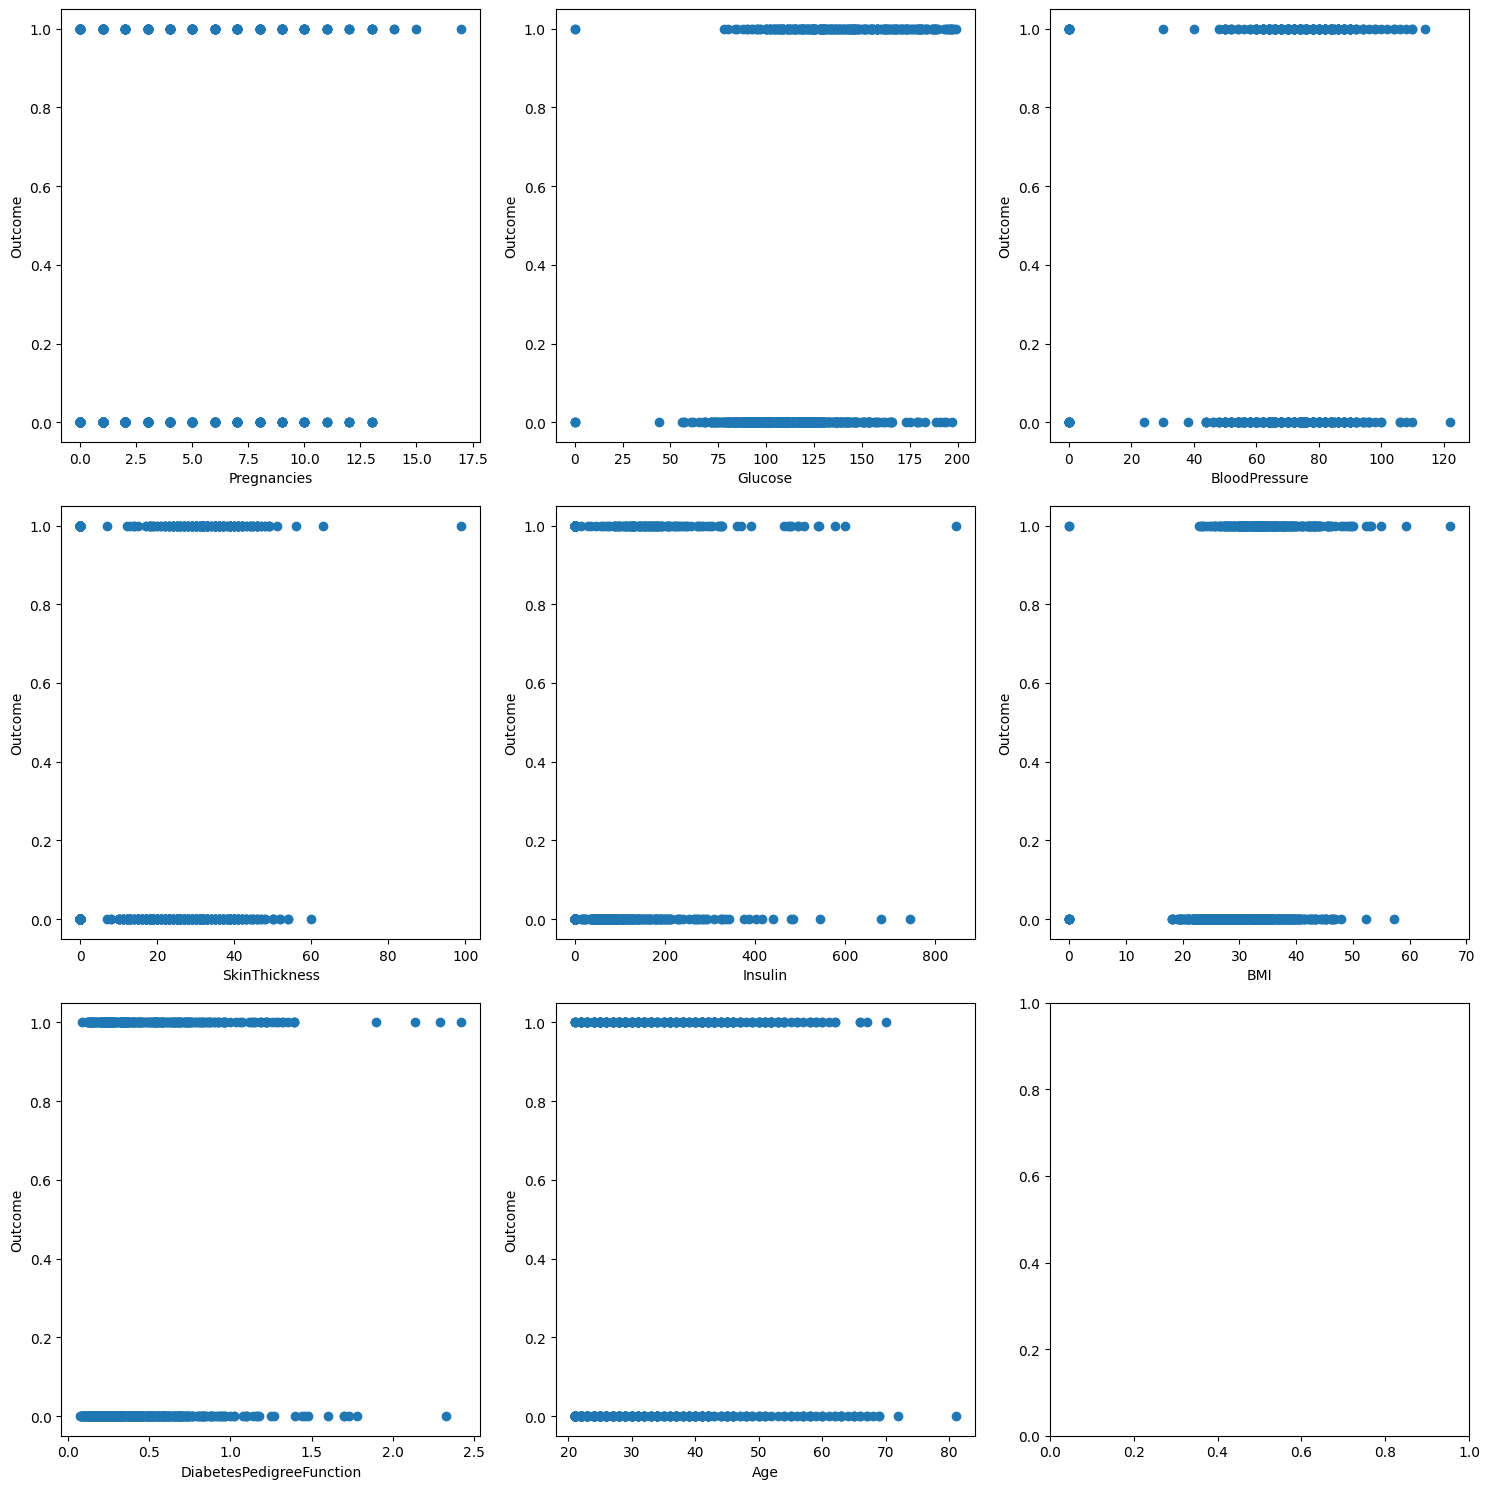

In [ ]:

# Analysing Noise in Data

col = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for i, column in enumerate(col):
    row = i // 3
    col_num = i % 3

    axs[row, col_num].scatter(diabetes_dataset[column], diabetes_dataset['Outcome'])
    axs[row, col_num].set_xlabel(column)
    axs[row, col_num].set_ylabel('Outcome')

plt.tight_layout()
plt.show()


In [ ]:
# BloodPressure, BMI, Glucose values are Zero, so we have to remove noise in data
# The plot shows that there are plenty of '0' values corresponding to most of the features. We can replace these
# values with domain knowlege, or we can simply apply the mean values.

# However, since the data did not have the 'Sex' feature, which means for the zero values in 'Pregnancies' can be
# assigned to male, therefore we will keep these zero values for the better estimations.


In [ ]:
 #Replacing 0's with NaN values for now

diabetes_dataset[['BloodPressure','Glucose','SkinThickness','Insulin','BMI']] = diabetes_dataset[['BloodPressure',
                                                                                                  'Glucose','SkinThickness','Insulin',
                                                                                                  'BMI']].replace(0, np.NaN)


In [ ]:
diabetes_dataset


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [ ]:
# now let's check missing values!
diabetes_dataset.isnull().sum()


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
# One way to handle this missing values is to use the mean of each column

df_m = diabetes_dataset.copy()  # df_m --> mean for missing values

df_m["BloodPressure"].fillna(diabetes_dataset["BloodPressure"].mean(), inplace=True)
df_m["Glucose"].fillna(diabetes_dataset["Glucose"].mean(), inplace=True)
df_m["SkinThickness"].fillna(diabetes_dataset["SkinThickness"].mean(), inplace=True)
df_m["Insulin"].fillna(diabetes_dataset["Insulin"].mean(), inplace=True)
df_m["BMI"].fillna(diabetes_dataset["BMI"].mean(), inplace=True)

In [ ]:
# let's check missing values again

df_m.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df_m


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [ ]:
# Dropping misiing values
df_r = diabetes_dataset.copy()
df_r.dropna(inplace=True)
# df_r = diabetes_dataset.dropna(inplace= True)


In [ ]:
# checking the distribution of Target Variable
df_m['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [ ]:
df_m.groupby('Outcome').mean()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.710121,70.935397,27.768651,142.210761,30.888434,0.429734,31.190000
1,4.865672,142.165573,75.147324,31.736944,180.431548,35.384757,0.550500,37.067164


In [ ]:
# separating the data and labels
X = df_m.drop(columns = 'Outcome', axis=1)
Y = df_m['Outcome']
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47


In [ ]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X) , columns = X.columns)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.670968,0.489796,0.304348,0.170130,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.428571,0.239130,0.170130,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.408163,0.240798,0.170130,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000
764,0.117647,0.503226,0.469388,0.217391,0.170130,0.380368,0.111870,0.100000
765,0.294118,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000
766,0.058824,0.529032,0.367347,0.240798,0.170130,0.243354,0.115713,0.433333


In [ ]:
print(Y)


0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [ ]:
#Splitting Data into Training data & Testing Data

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)


(768, 8) (614, 8) (154, 8)


Logistic Regression

In [ ]:
logistic_reg = LogisticRegression(random_state = 0)
logistic_reg.fit(X_train, Y_train) # Training


LogisticRegression(random_state=0)

In [ ]:
# accuracy on training data
X_train_prediction1 = logistic_reg.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction1, Y_train)

print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.7671009771986971


In [ ]:
# accuracy on test data
X_test_prediction1 = logistic_reg.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction1, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)


Accuracy on Test data :  0.7597402597402597


In [ ]:
# Confusion Matrix
print(classification_report(Y_test , X_test_prediction1))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       109
           1       0.61      0.49      0.54        45

    accuracy                           0.76       154
   macro avg       0.71      0.68      0.69       154
weighted avg       0.75      0.76      0.75       154



In [ ]:
dec_tree_clf = DecisionTreeClassifier(random_state=0, max_depth = 5 , min_samples_leaf = 1 , min_samples_split = 5)
dec_tree_clf.fit(X_train, Y_train)  # fits the data

DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=0)

In [ ]:
# accuracy on training data
X_train_prediction2 = dec_tree_clf.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction2, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8436482084690554


In [ ]:
# accuracy on test data
X_test_prediction2 = dec_tree_clf.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction2, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.7662337662337663


In [ ]:
# Confusion Matrix
print(classification_report(Y_test , X_test_prediction2))


              precision    recall  f1-score   support

           0       0.83      0.84      0.84       109
           1       0.60      0.58      0.59        45

    accuracy                           0.77       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.76      0.77      0.76       154



In [ ]:
random_forest_clf = RandomForestClassifier(max_depth = 6, random_state=0)  # creating object or instance
random_forest_clf.fit(X_train, Y_train)  # fits the data

RandomForestClassifier(max_depth=6, random_state=0)

In [ ]:
# accuracy on training data
X_train_prediction3 = random_forest_clf.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction3, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8908794788273615


In [ ]:
# accuracy on test data
X_test_prediction3 = random_forest_clf.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction3, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)


Accuracy on Test data :  0.7597402597402597


In [ ]:
# Confusion Matrix
print(classification_report(Y_test , X_test_prediction3))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       109
           1       0.59      0.58      0.58        45

    accuracy                           0.76       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.76      0.76      0.76       154



In [ ]:
# Linear Kernel
svcLinear =  SVC(kernel='linear', C=100, gamma=0.001)
svcLinear.fit(X_train, Y_train)


SVC(C=100, gamma=0.001, kernel='linear')

In [ ]:
# accuracy on training data
X_train_prediction4 = svcLinear.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction4, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.7752442996742671


In [ ]:
# accuracy on test data
X_test_prediction4 = svcLinear.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction4, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.7532467532467533


In [ ]:
# Sigmoid Kernel
svm = SVC(kernel = 'sigmoid', gamma=0.001, C = 100)
svm.fit(X_train, Y_train)

SVC(C=100, gamma=0.001, kernel='sigmoid')

In [ ]:
# accuracy on training data
X_train_prediction4 = svm.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction4, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.762214983713355


In [ ]:
# accuracy on test data
X_test_prediction4 = svm.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction4, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)


Accuracy on Test data :  0.7597402597402597


In [ ]:
# Confusion Matrix
print(classification_report(Y_test , X_test_prediction4))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       109
           1       0.64      0.40      0.49        45

    accuracy                           0.76       154
   macro avg       0.71      0.65      0.67       154
weighted avg       0.74      0.76      0.74       154



In [ ]:
# Sigmoid Kernel
svm = SVC(class_weight='balanced', gamma='auto', C = 1)
svm.fit(X_train, Y_train)

SVC(C=1, class_weight='balanced', gamma='auto')

In [ ]:
# accuracy on training data
X_train_prediction5 = svm.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction5, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.760586319218241


In [ ]:
clf = SVC()
grid = {'C':[0.001, 0.01, 0.1, 0.5, 1],'gamma':['scale', 'auto']}
abc = GridSearchCV(clf, grid)
abc.fit(X_train, Y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [ ]:
abc.best_estimator_


SVC(C=1, gamma='auto')

In [ ]:
# accuracy on test data
X_test_prediction5 = svm.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction5, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)


Accuracy on Test data :  0.7272727272727273


In [ ]:
clf = GaussianNB()
clf.fit(X_train,Y_train.ravel())
Y_pred = clf.predict(X_test)
print("Accuracy:" , accuracy_score(Y_test,Y_pred))

Accuracy: 0.7402597402597403


In [ ]:
confusion_matrix(Y,clf.predict(X))


array([[416,  84],
       [105, 163]])

In [ ]:
confusion_matrix(Y,svm.predict(X))


array([[390, 110],
       [ 79, 189]])